In [66]:
# 18 Apr 2025 - arpan
# heat wave detection

In [10]:
import pandas as pd

In [12]:
import numpy as np

In [14]:
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns

In [20]:
df = pd.read_csv("All_normals.csv")

In [26]:
print(df.head())
print(df['Tmean_11yr_avg'].max())
print(df['Tmean_11yr_avg'].min())

         Date  Latitude  Longitude   Tmax   Tmin  Rain   Tmean  Month  Day  \
0  2012-01-01      21.5       85.5  28.45  17.24   0.0  22.845      1    1   
1  2012-01-02      21.5       85.5  27.20  17.68   0.0  22.440      1    2   
2  2012-01-03      21.5       85.5  27.56  17.51   0.0  22.535      1    3   
3  2012-01-04      21.5       85.5  25.63  17.69   0.0  21.660      1    4   
4  2012-01-05      21.5       85.5  27.87  18.00   0.0  22.935      1    5   

   Tmax_11yr_avg  Tmean_11yr_avg  Tmin_11yr_avg Climatology_Date  Heatwave  
0      26.641558       20.079763      13.517967       2012-01-01      True  
1      26.625483       20.375367      14.125250       2012-01-02      True  
2      26.457708       20.423900      14.390092       2012-01-03      True  
3      26.350358       20.075042      13.799725       2012-01-04      True  
4      26.976725       20.042538      13.108350       2012-01-05      True  
33.2417125
14.546970833333331


In [28]:
df['Heatwave'] = df['Tmax'] - df['Tmean_11yr_avg'] >= 4.5

df_heatwaves = df[df['Heatwave']]

print(df_heatwaves[['Date', 'Latitude', 'Longitude', 'Tmax', 'Tmean_11yr_avg']].head())
df_heatwaves.to_csv("heatwave_days.csv", index=False)


         Date  Latitude  Longitude   Tmax  Tmean_11yr_avg
0  2012-01-01      21.5       85.5  28.45       20.079763
1  2012-01-02      21.5       85.5  27.20       20.375367
2  2012-01-03      21.5       85.5  27.56       20.423900
3  2012-01-04      21.5       85.5  25.63       20.075042
4  2012-01-05      21.5       85.5  27.87       20.042538


In [30]:
df_heatwaves['Date'] = pd.to_datetime(df_heatwaves['Date'], format='%Y-%m-%d')
df_heatwaves['Year'] = df_heatwaves['Date'].dt.year
heatwave_counts = df_heatwaves.groupby('Year').size()

print(heatwave_counts)

Year
2012    4618
2013    4131
2014    4570
2015    4997
2016    4837
2017    4931
2018    4644
2019    4555
2020    4222
2021    4522
2022    4622
2023    5141
dtype: int64


/tmp/ipykernel_17053/2610496299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatwaves['Date'] = pd.to_datetime(df_heatwaves['Date'], format='%Y-%m-%d')
/tmp/ipykernel_17053/2610496299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatwaves['Year'] = df_heatwaves['Date'].dt.year


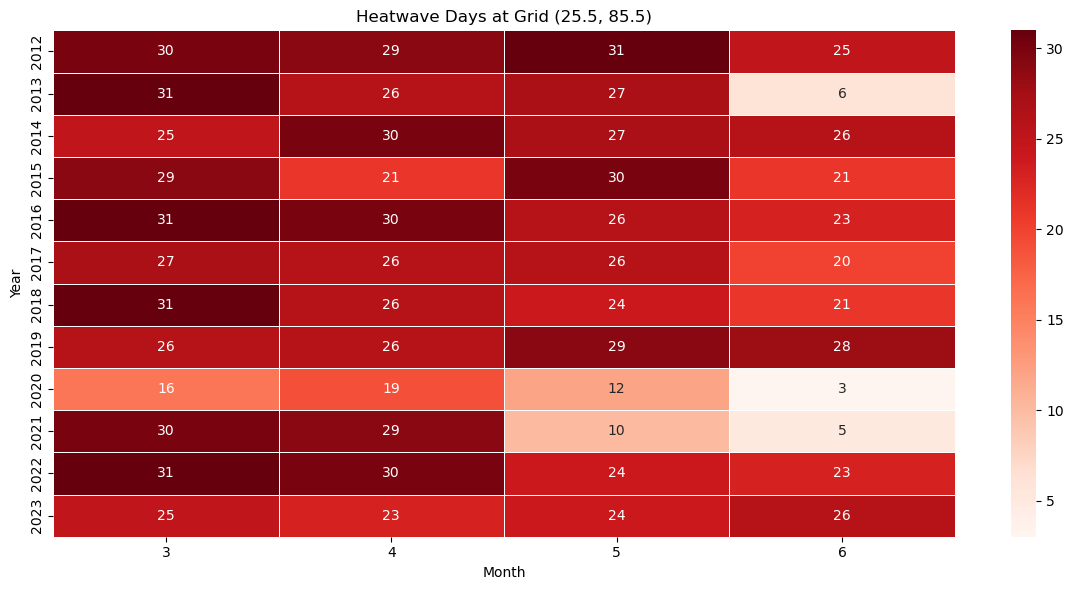

In [138]:
lat, lon = 25.5, 85.5

# Filter the data for that grid
df_grid = df[(df['Latitude'] == lat) & (df['Longitude'] == lon) & df['Month'].isin([3, 4, 5, 6])].copy()
df_grid['Date'] = pd.to_datetime(df_grid['Date'], format='%Y-%m-%d')

# Detect heatwave days
df_grid['Heatwave'] = ((df_grid['Tmax'] - df_grid['Tmean_11yr_avg']) > 4.5)

# Extract Year and Month
df_grid['Year'] = df_grid['Date'].dt.year
df_grid['Month'] = df_grid['Date'].dt.month

# Count heatwave days for each month-year
heatwave_counts = df_grid[df_grid['Heatwave']].groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatwave_counts, cmap='Reds', annot=True, fmt="d", linewidths=0.5)
plt.title(f'Heatwave Days at Grid ({lat}, {lon})')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

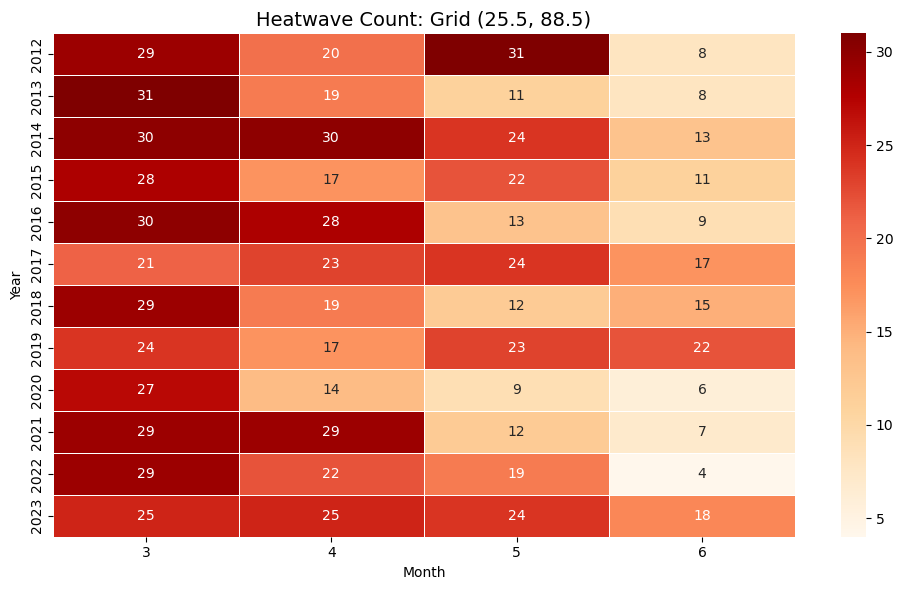

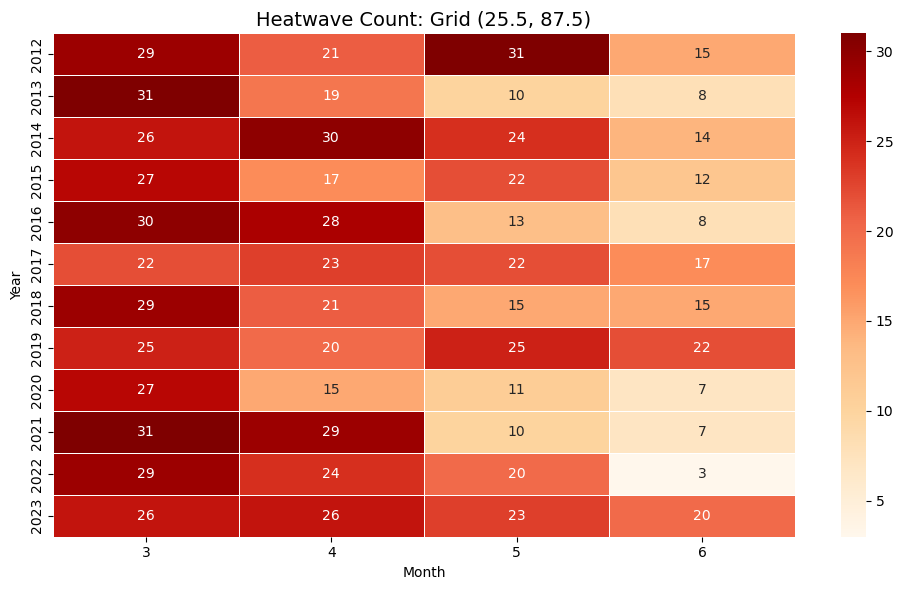

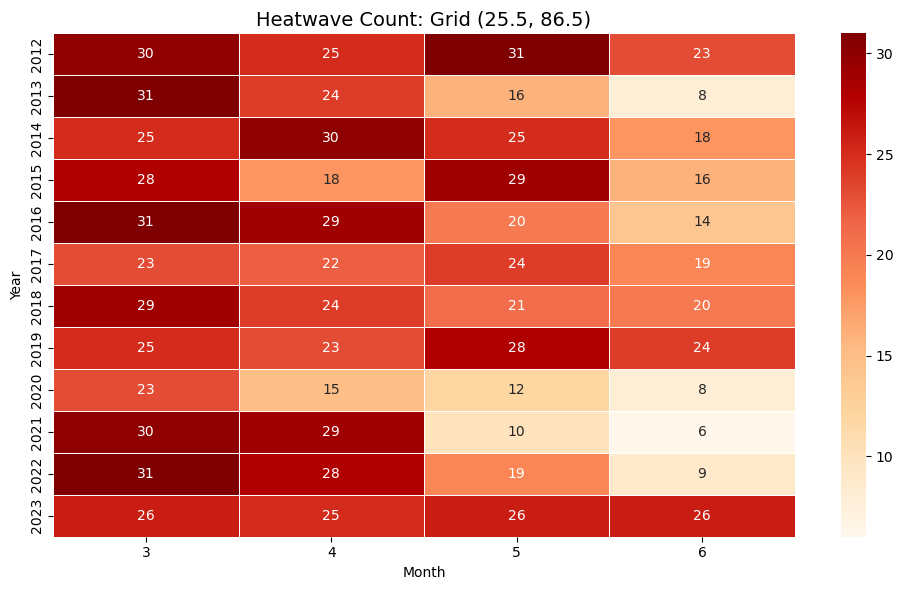

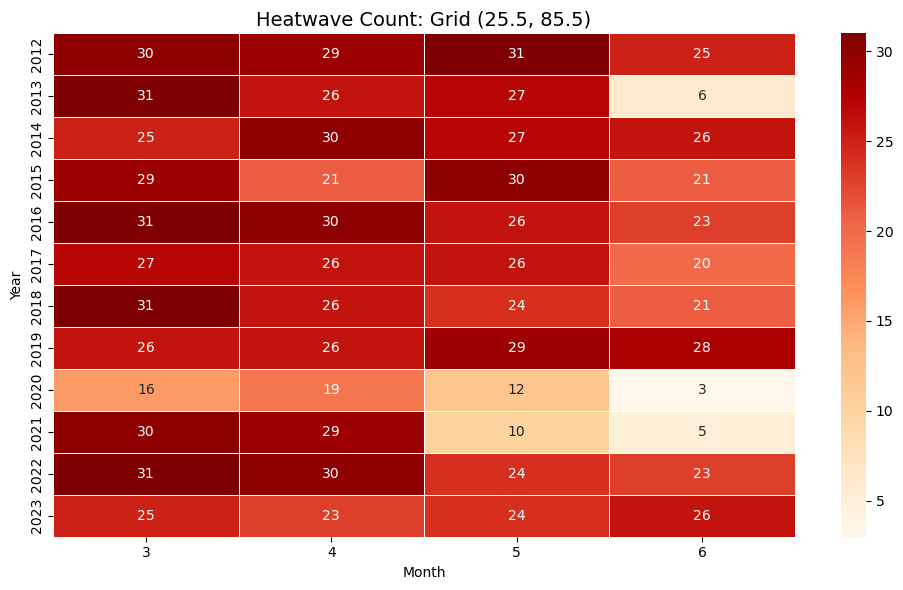

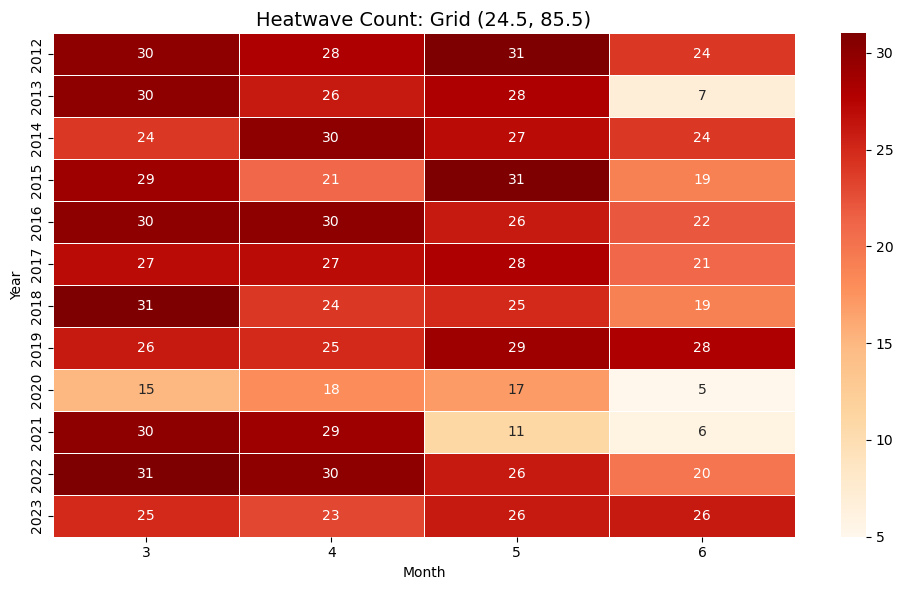

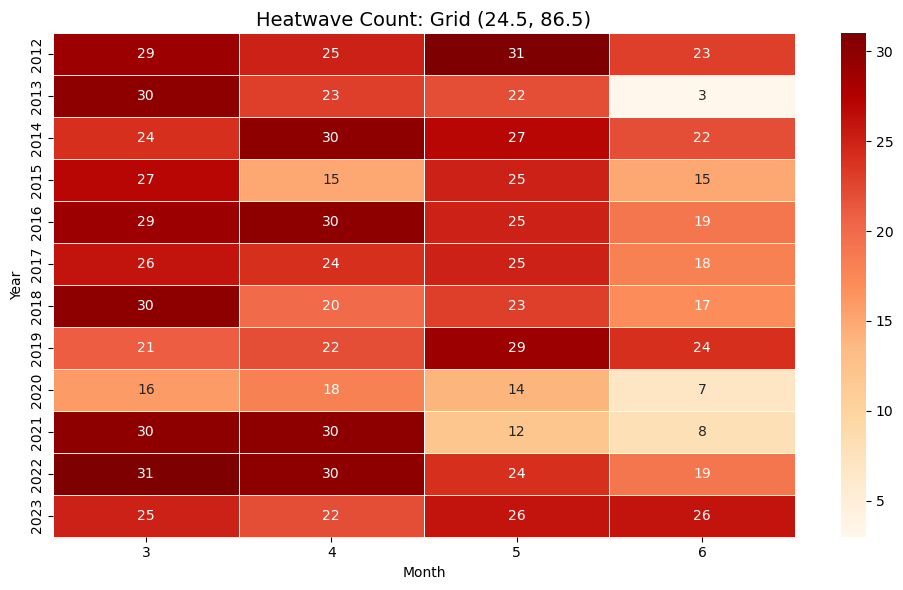

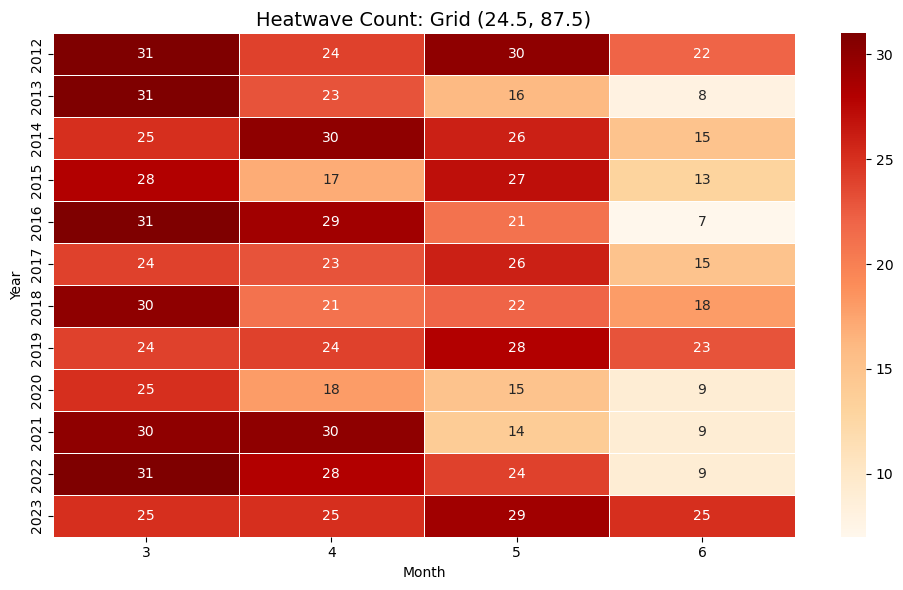

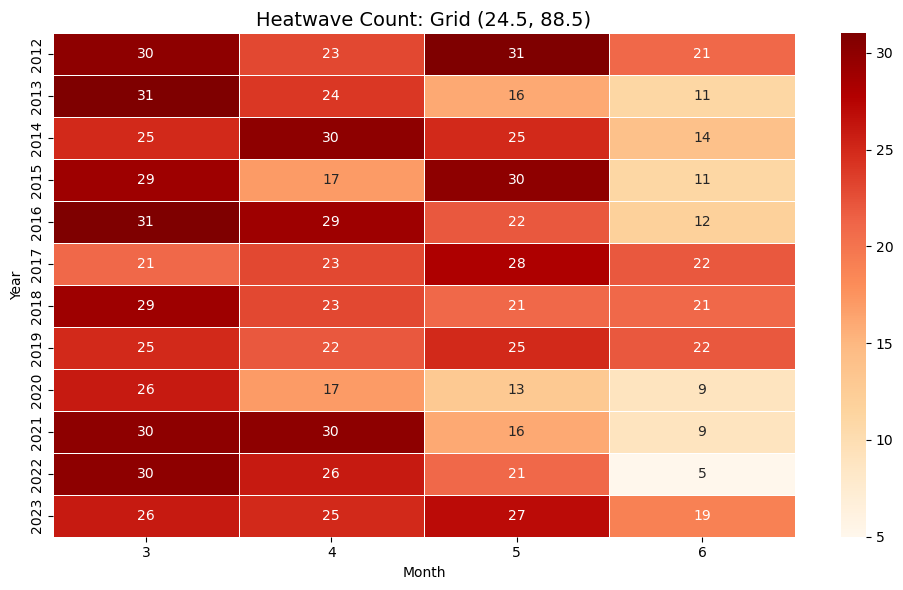

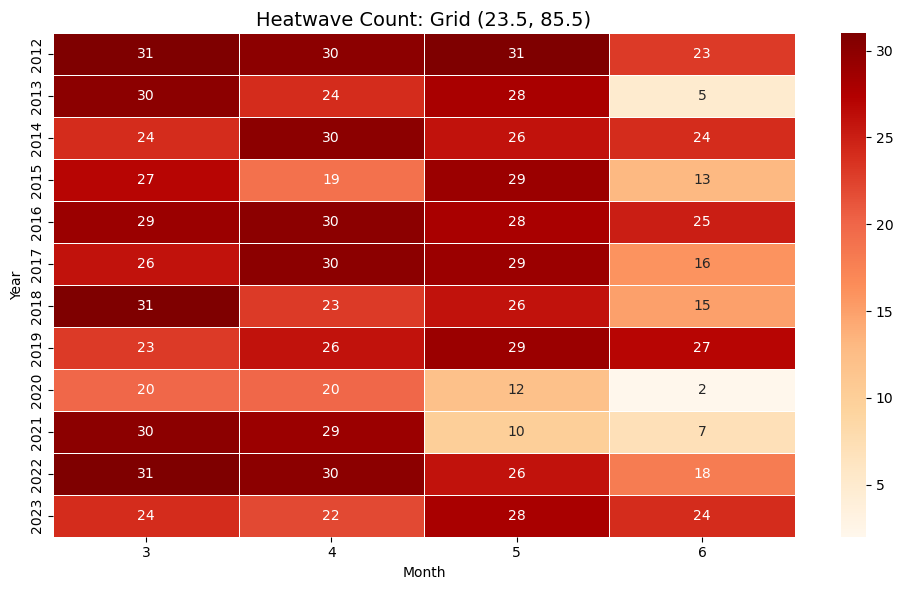

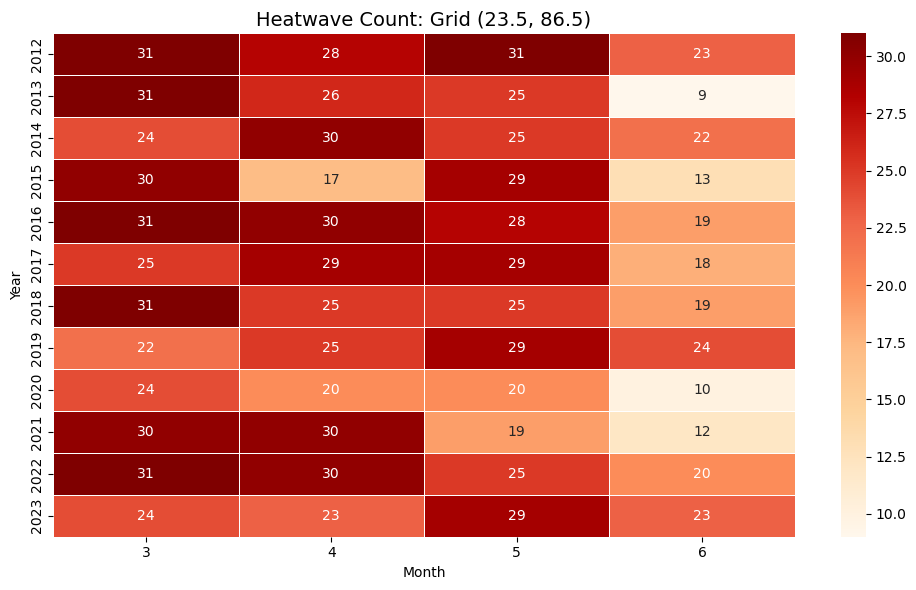

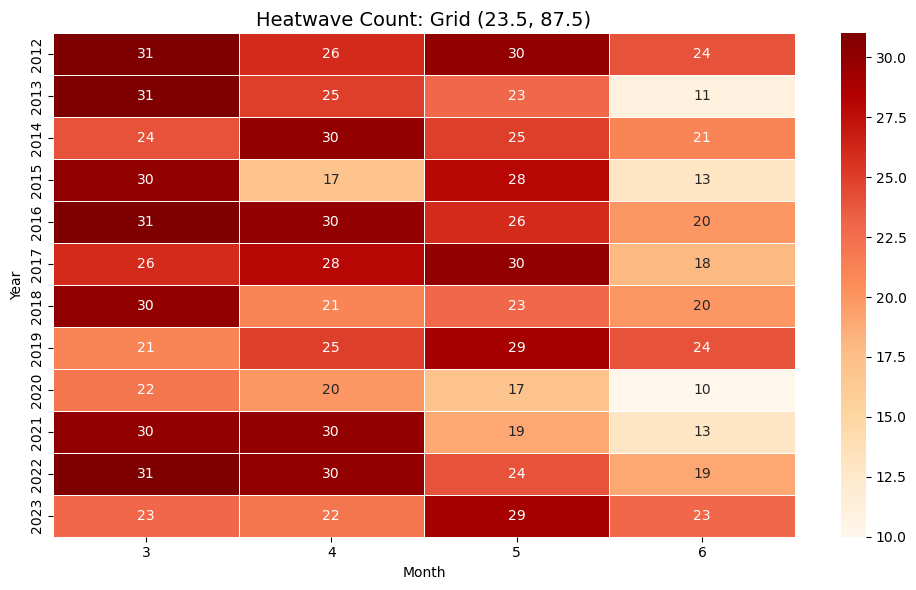

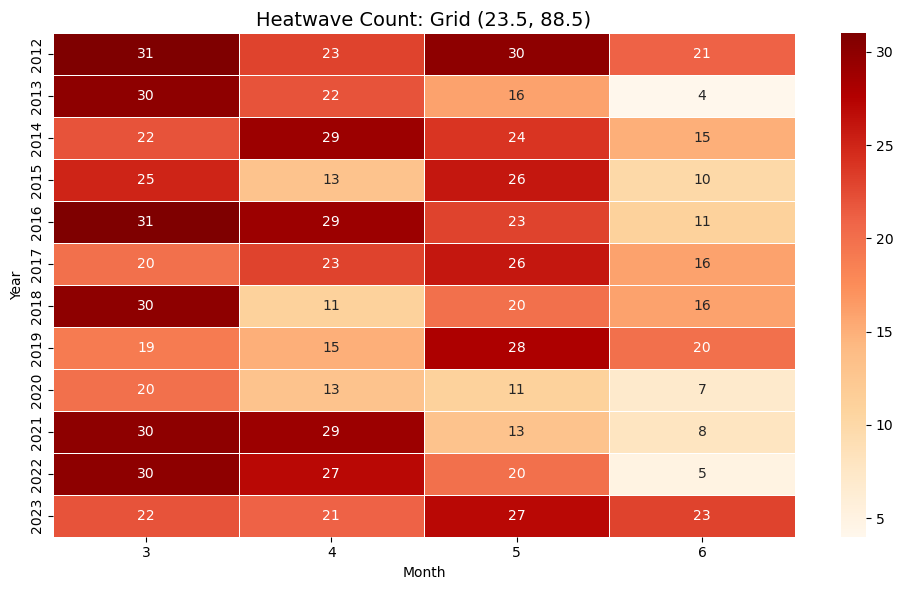

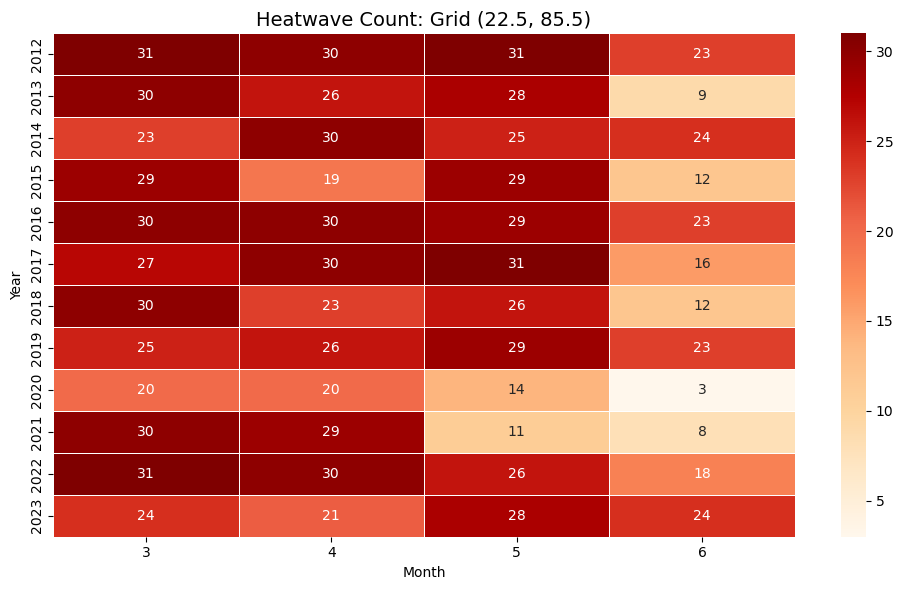

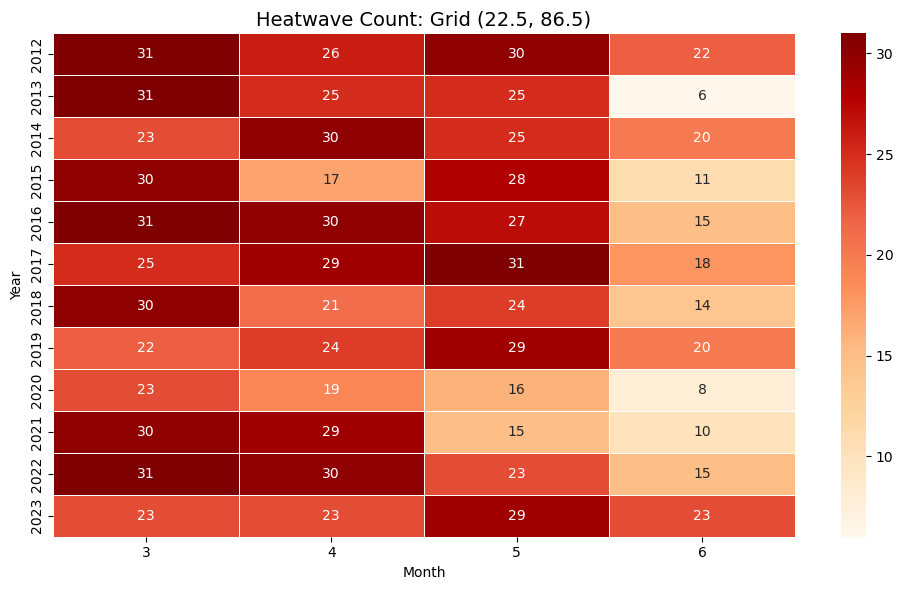

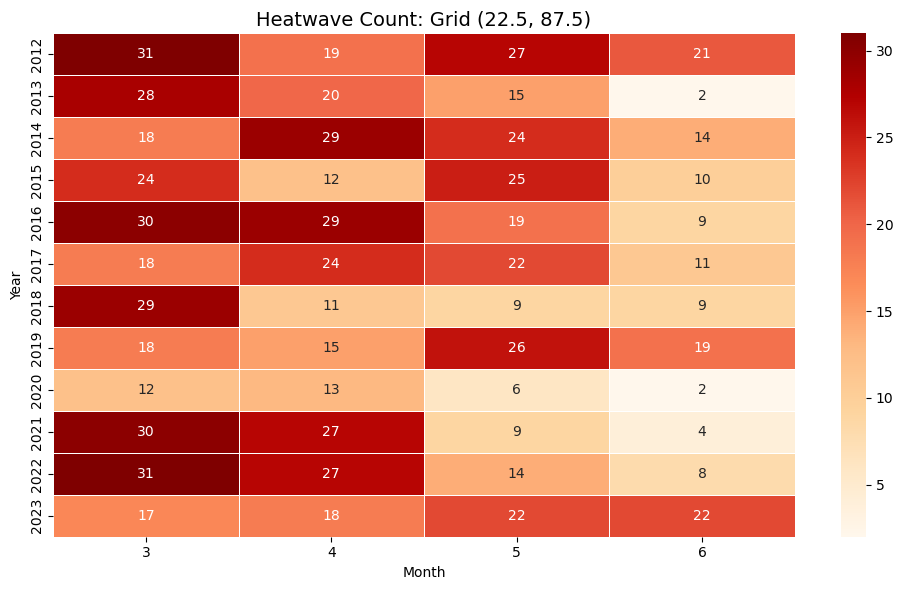

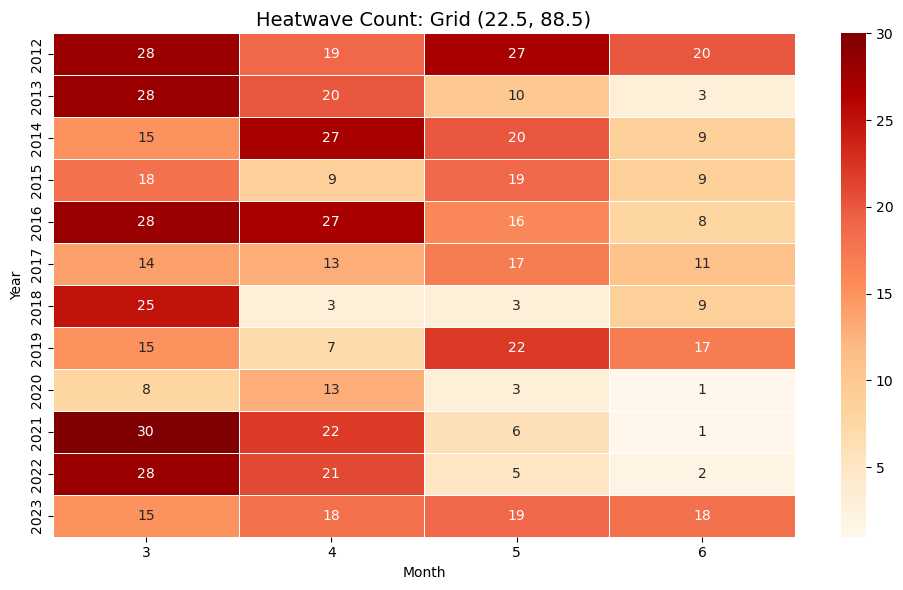

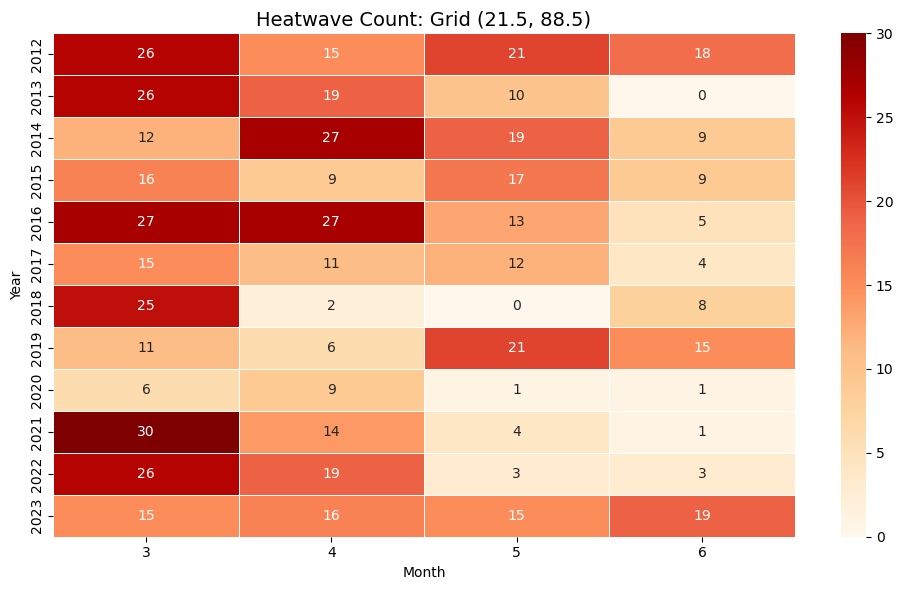

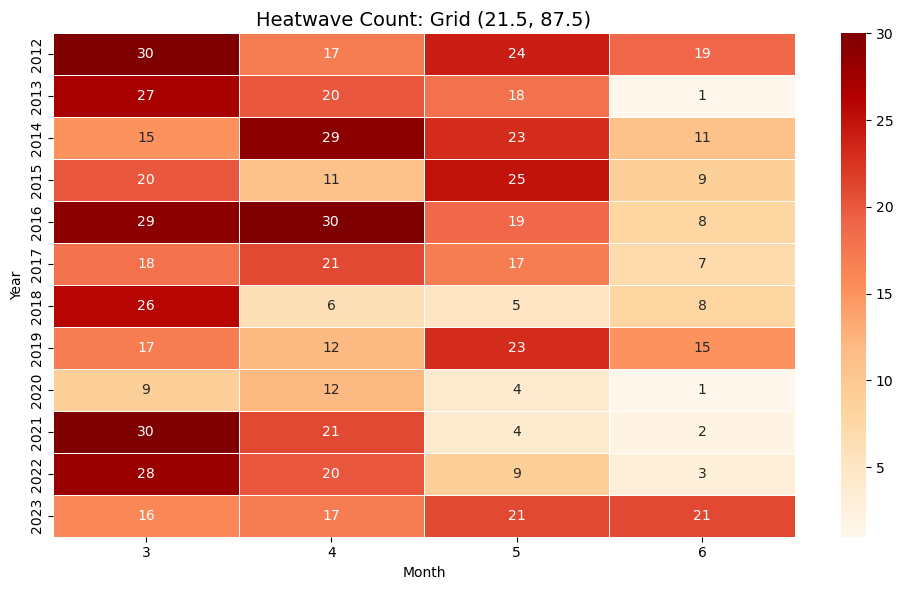

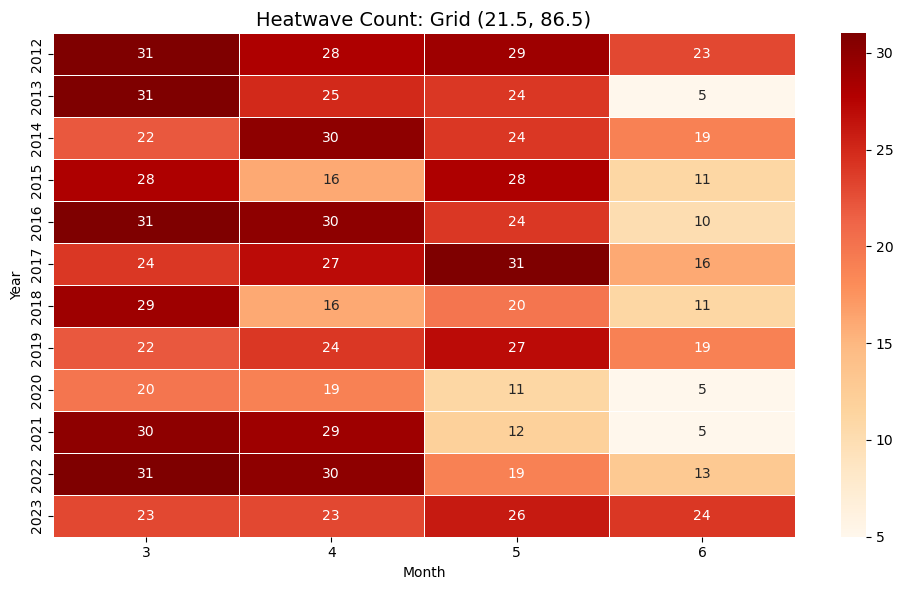

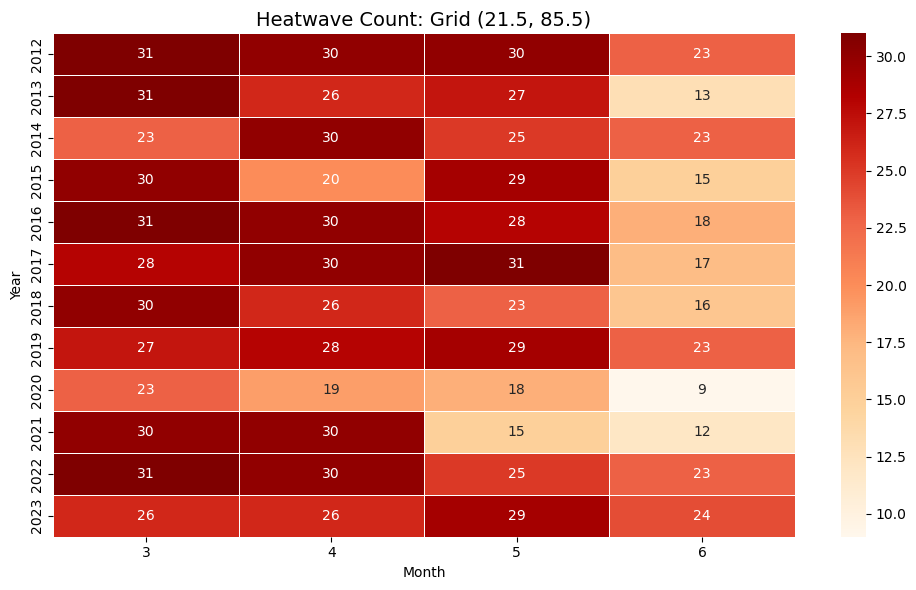

In [140]:
grid_points = df[['Latitude', 'Longitude']].drop_duplicates().sort_values(by='Latitude', ascending=False).values

for lat, lon in grid_points:
    df_grid = df[(df['Latitude'] == lat) & (df['Longitude'] == lon) & df['Month'].isin([3, 4, 5, 6])].copy()
    df_grid['Date'] = pd.to_datetime(df_grid['Date'], format='%Y-%m-%d')
    df_grid['Year'] = df_grid['Date'].dt.year
    df_grid['Month'] = df_grid['Date'].dt.month

    # Apply heatwave condition
    df_grid['Heatwave'] = ((df_grid['Tmax'] - df_grid['Tmean_11yr_avg']) > 4.5)

    # Group by Year and Month
    heatwave_counts = df_grid[df_grid['Heatwave']].groupby(['Year', 'Month']).size().unstack(fill_value=0)

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatwave_counts, cmap='OrRd', linewidths=0.5, annot=True, fmt='d')
    plt.title(f'Heatwave Count: Grid ({lat}, {lon})', fontsize=14)
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.tight_layout()
    plt.show()

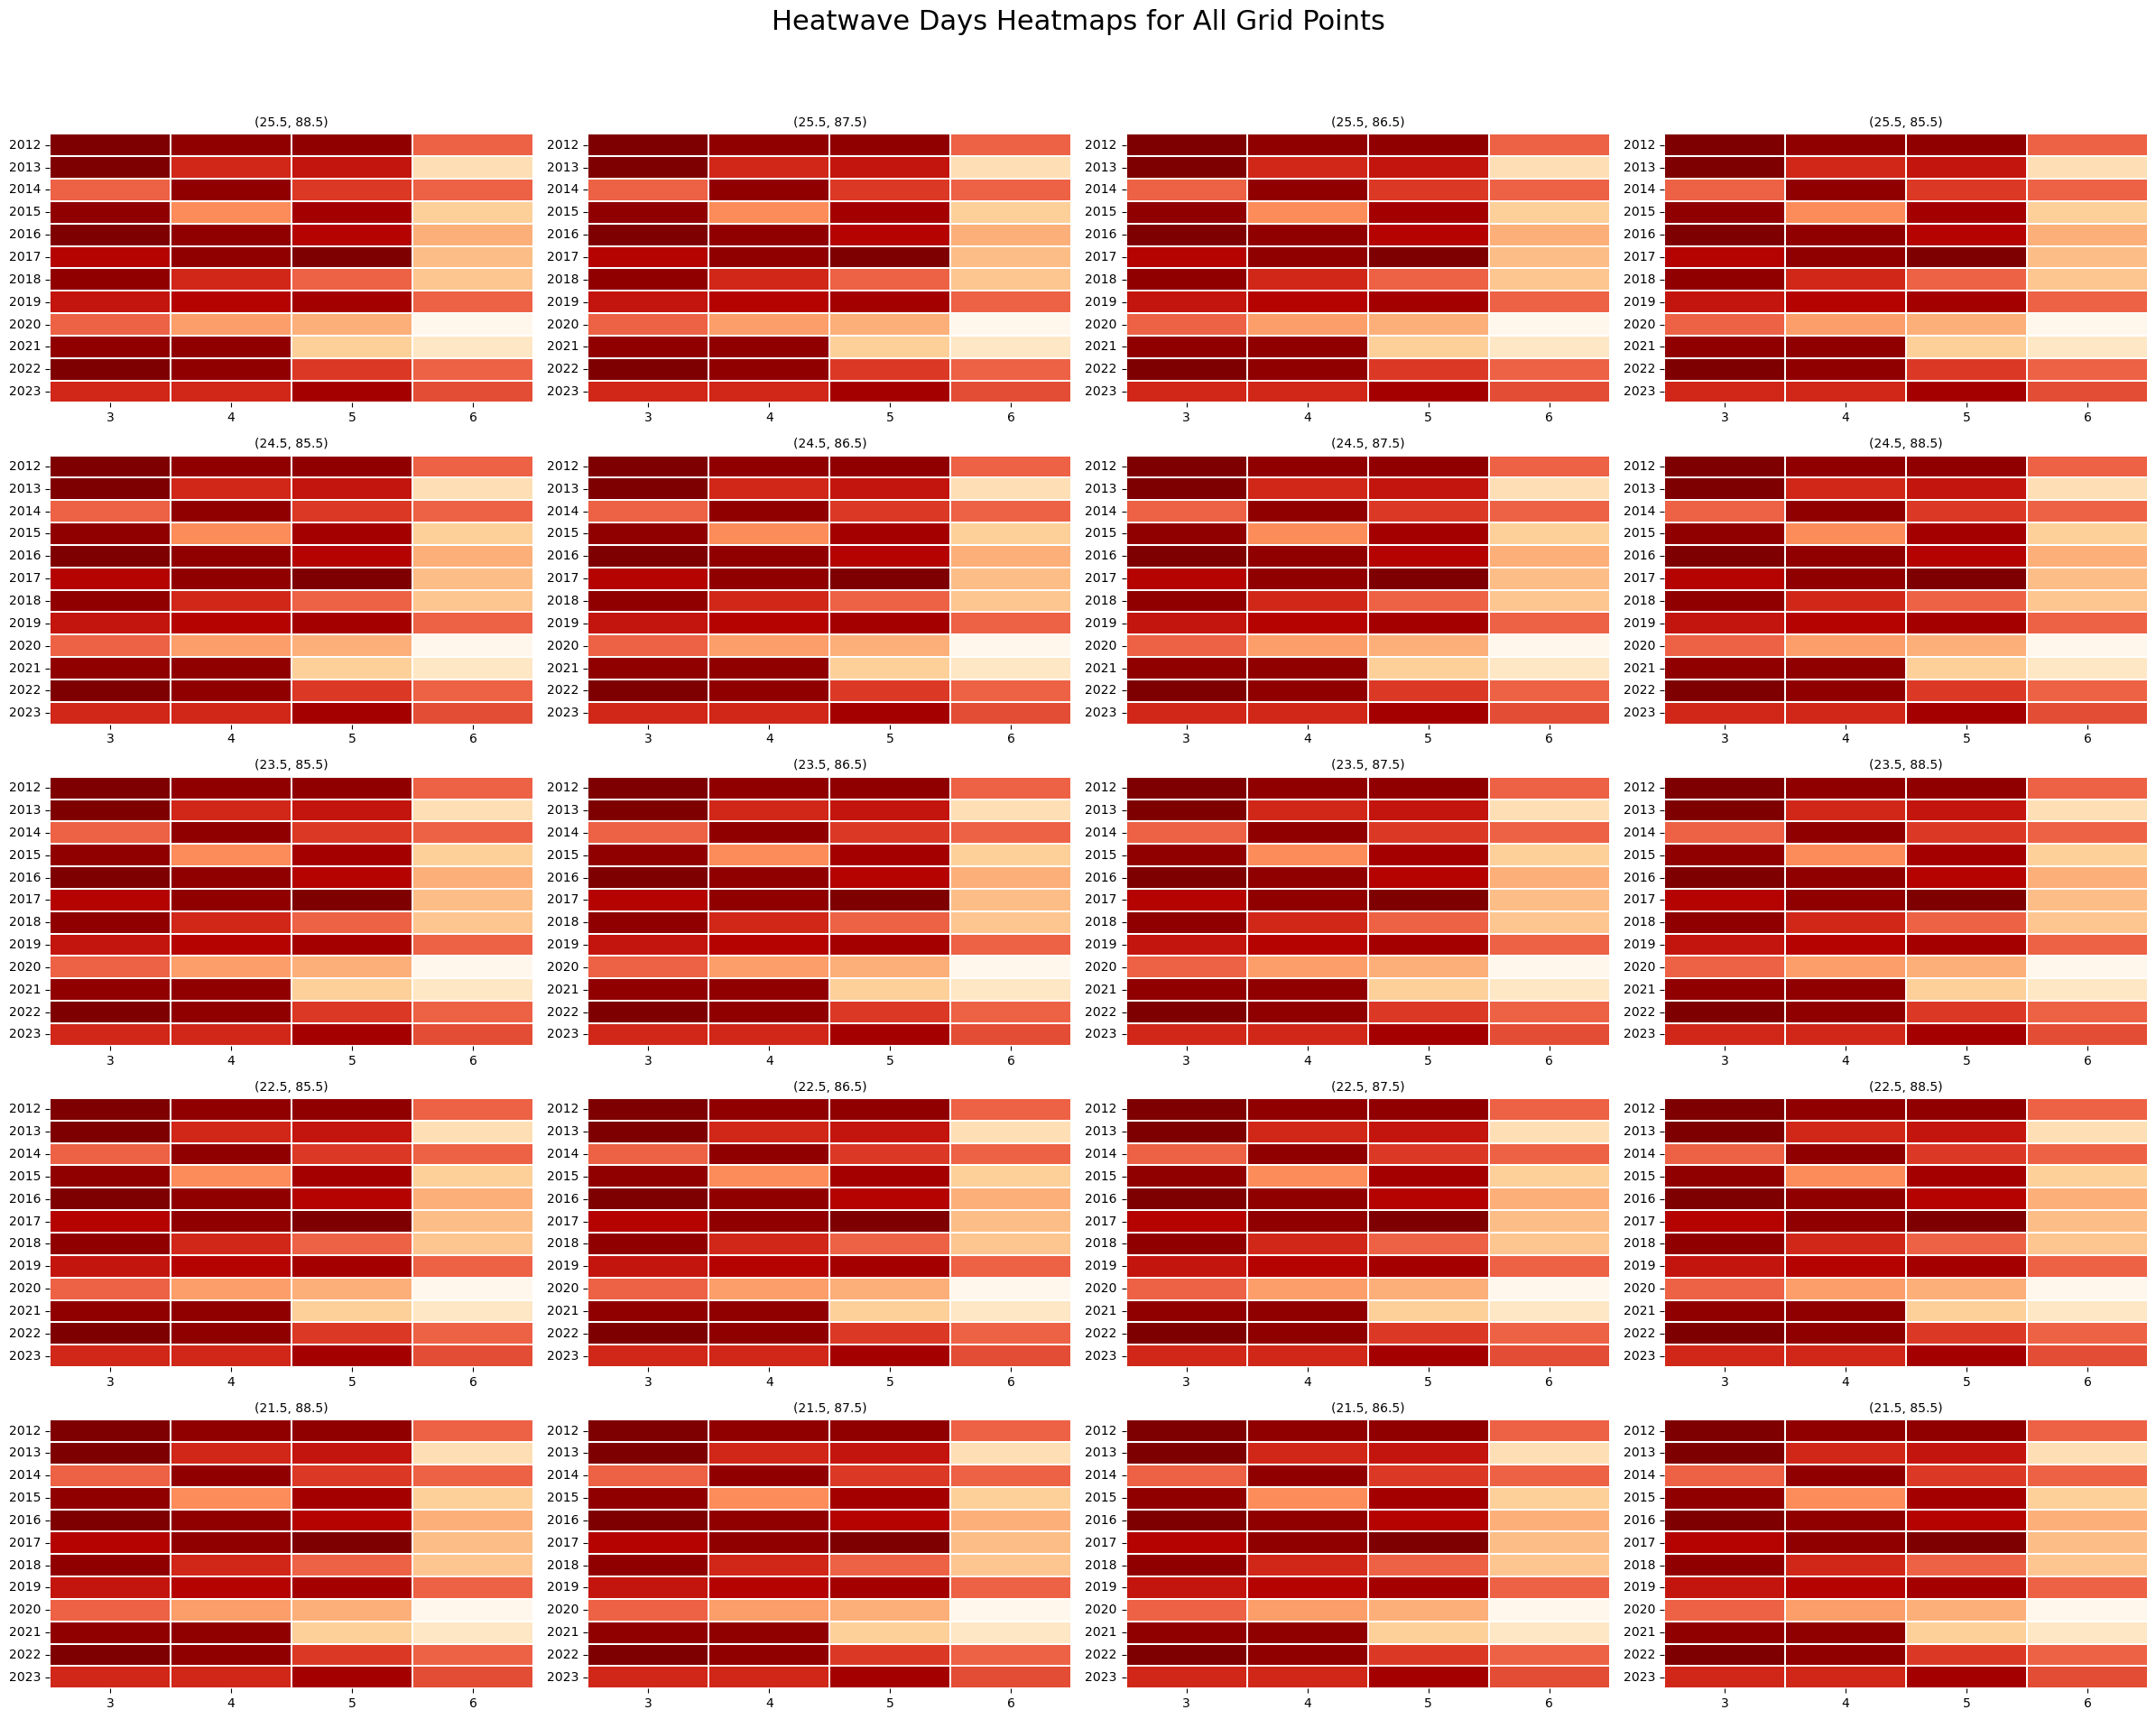

In [152]:
fig, axs = plt.subplots(5, 4, figsize=(24, 20))
fig.suptitle('Heatwave Days Heatmaps for All Grid Points', fontsize=22)

# Loop through grid points
for i, (lat, lon) in enumerate(grid_points):
    ax = axs[i // 4, i % 4]
    df_grid = df[(df['Latitude'] == lat) & (df['Longitude'] == lon) & df['Month'].isin([2,3, 4, 5, 6,7,8])].copy()
    df_grid['Date'] = pd.to_datetime(df_grid['Date'], format='%Y-%m-%d')
    df_grid['Year'] = df_grid['Date'].dt.year
    df_grid['Month'] = df_grid['Date'].dt.month

    df_grid['Heatwave'] = ((df_grid['Tmax'] - df_grid['Tmean_11yr_avg']) > 6.5)

    sns.heatmap(heatwave_counts, cmap='OrRd', cbar=False, ax=ax, linewidths=0.3, annot=False)
    ax.set_title(f'({lat}, {lon})', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [32]:
df['Tmax_TmeanDiff_MarToJun'] = np.nan

# Apply condition using boolean mask
mask = (df['Month'].isin([3, 4, 5, 6])) & ((df['Tmax'] - df['Tmean_11yr_avg']) > 4.5)

# Assign values only where the condition is True
df.loc[mask, 'Tmax_TmeanDiff_MarToJun'] = df['Tmax'] - df['Tmean_11yr_avg']
df['Tmax_TmeanDiff_MarToJun'].fillna(0, inplace=True)

# Check the result
print(df.head(30))

          Date  Latitude  Longitude   Tmax   Tmin     Rain   Tmean  Month  \
0   2012-01-01      21.5       85.5  28.45  17.24   0.0000  22.845      1   
1   2012-01-02      21.5       85.5  27.20  17.68   0.0000  22.440      1   
2   2012-01-03      21.5       85.5  27.56  17.51   0.0000  22.535      1   
3   2012-01-04      21.5       85.5  25.63  17.69   0.0000  21.660      1   
4   2012-01-05      21.5       85.5  27.87  18.00   0.0000  22.935      1   
5   2012-01-06      21.5       85.5  28.12  18.88   0.0000  23.500      1   
6   2012-01-07      21.5       85.5  24.40  18.55   0.2236  21.475      1   
7   2012-01-08      21.5       85.5  25.09  18.60   8.8526  21.845      1   
8   2012-01-09      21.5       85.5  24.12  17.84  92.8360  20.980      1   
9   2012-01-10      21.5       85.5  21.11  15.49  15.0561  18.300      1   
10  2012-01-11      21.5       85.5  22.81  12.88  17.8729  17.845      1   
11  2012-01-12      21.5       85.5  23.58  10.40   0.0000  16.990      1   

/tmp/ipykernel_17053/4064346154.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tmax_TmeanDiff_MarToJun'].fillna(0, inplace=True)


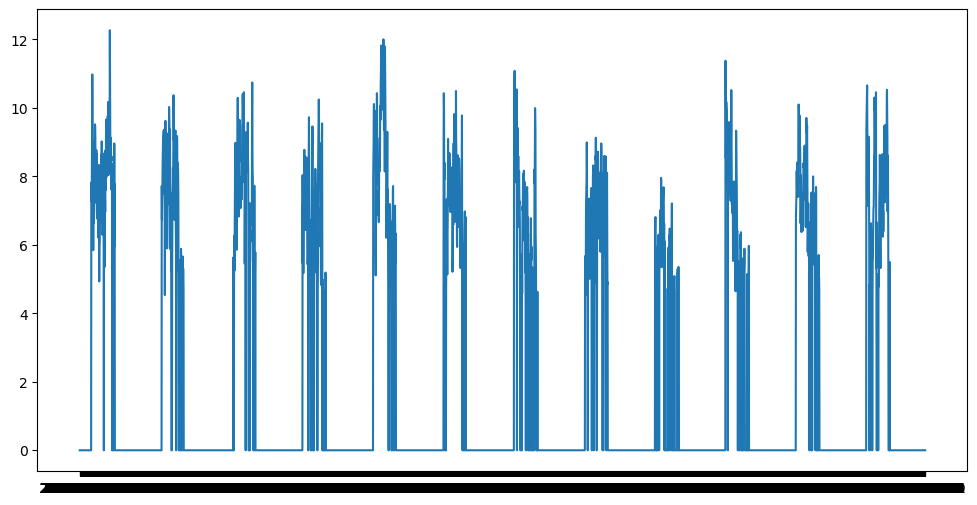

In [220]:
lat = 21.5
lon = 85.5

# Filter data for that grid and months March–June
df_grid = df[(df['Latitude'] == lat) & (df['Longitude'] == lon)].copy()
plt.figure(figsize=(12, 6))
plt.plot(df_grid['Date'], df_grid['Tmax_TmeanDiff_MarToJun'])
plt.show()

In [222]:
import altair as alt

In [239]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 4.1 MB/s eta 0:00:00a 0:00:01


In [44]:
import geopandas as gpd

india_map = gpd.read_file('IND.geojson')
#print(india_map.head(200))

In [46]:
west_bengal_map = india_map[india_map['shapeName'] == 'West Bengal']

In [263]:
import json

In [40]:
from scipy.interpolate import griddata

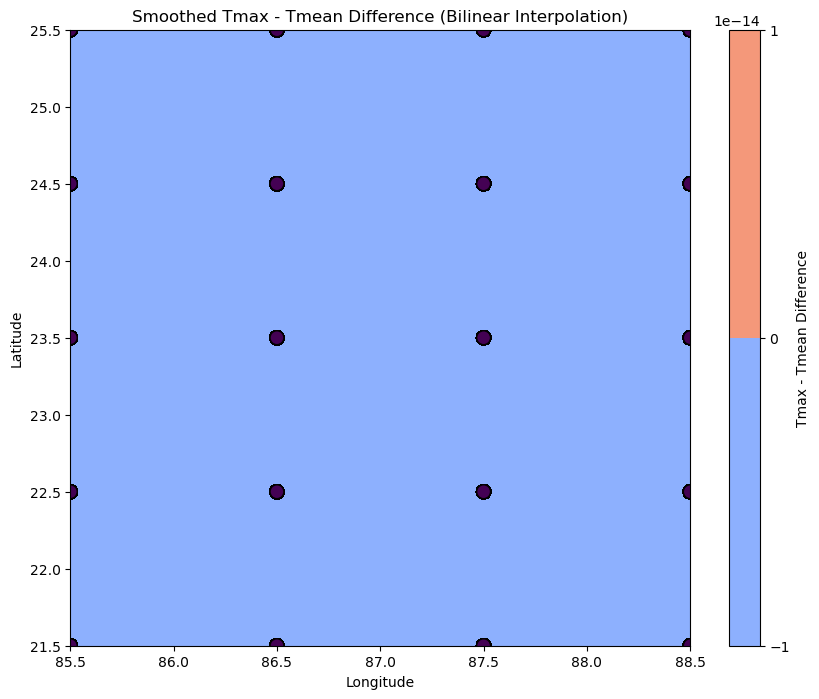

In [289]:
# Bilinear Interpolation
points = df[['Longitude', 'Latitude']].values
values = df['Tmax_TmeanDiff_MarToJun'].values
grid_lon, grid_lat = np.meshgrid(np.linspace(df['Longitude'].min(), df['Longitude'].max(), 100),
                                 np.linspace(df['Latitude'].min(), df['Latitude'].max(), 100))

grid_values = griddata(points, values, (grid_lon, grid_lat), method='linear')
plt.figure(figsize=(10, 8))
plt.contourf(grid_lon, grid_lat, grid_values, cmap='coolwarm', levels=20)
plt.colorbar(label='Tmax - Tmean Difference')
plt.scatter(df['Longitude'], df['Latitude'], c=df['Tmax_TmeanDiff_MarToJun'], edgecolor='k', s=100, label='Data points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Smoothed Tmax - Tmean Difference (Bilinear Interpolation)')
plt.show()

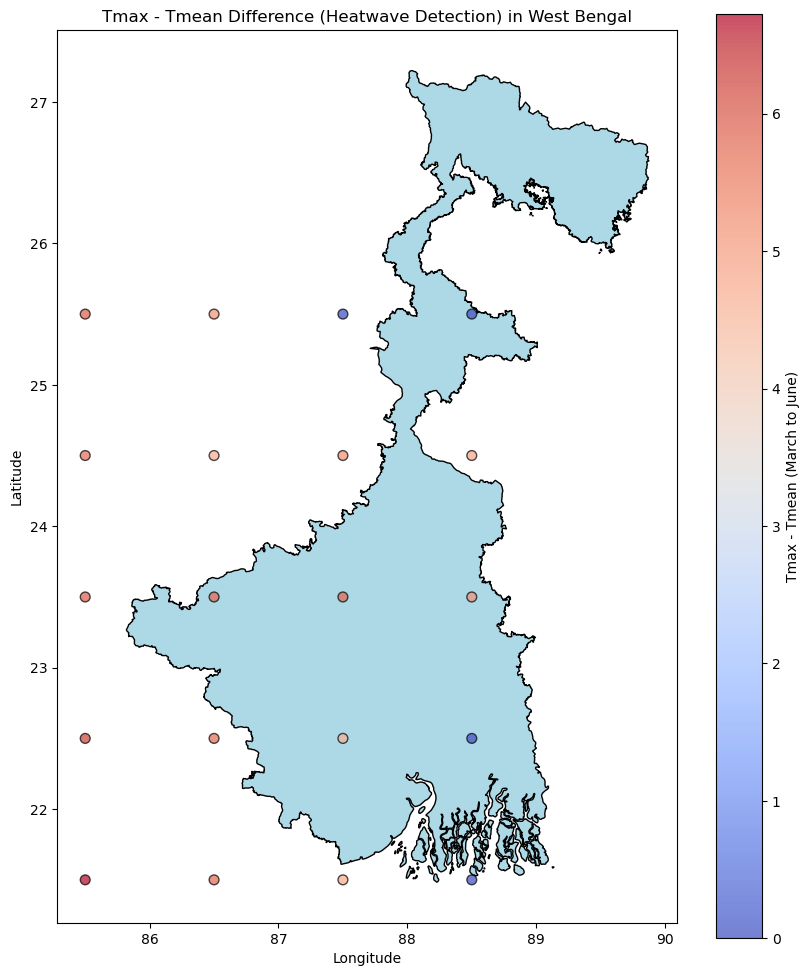

In [283]:
specific_day = '2012-03-15'
df_single_day = df[df['Date'] == specific_day]

fig, ax = plt.subplots(figsize=(10, 12))
west_bengal_map.plot(ax=ax, color='lightblue', edgecolor='black')

scatter = ax.scatter(
    df_single_day['Longitude'], df_single_day['Latitude'], 
    c=df_single_day['Tmax_TmeanDiff_MarToJun'], 
    cmap='coolwarm', s=50, edgecolor='k', alpha=0.7
)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Tmax - Tmean (March to June)')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Tmax - Tmean Difference (Heatwave Detection) in West Bengal')

# Show the plot
plt.show()

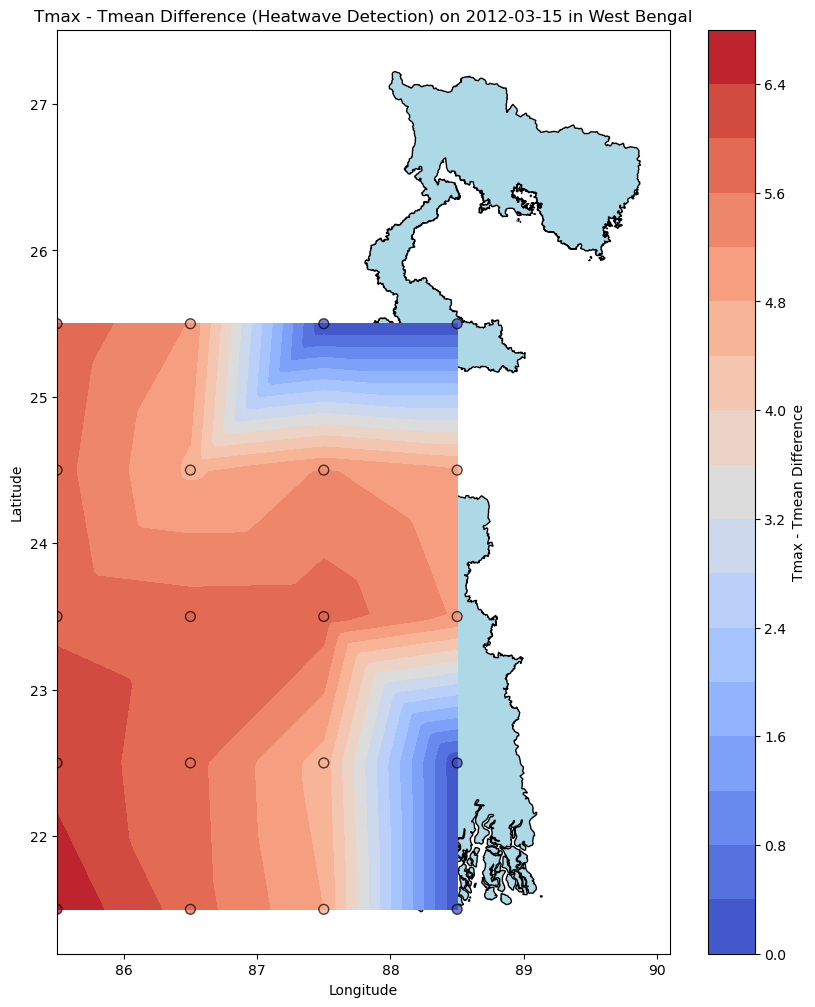

In [291]:
specific_day = '2012-03-15'
df_single_day = df[df['Date'] == specific_day]
grid_lon, grid_lat = np.meshgrid(
    np.linspace(df_single_day['Longitude'].min(), df_single_day['Longitude'].max(), 100),  # 100 points along Longitude
    np.linspace(df_single_day['Latitude'].min(), df_single_day['Latitude'].max(), 100)  # 100 points along Latitude
)
points = df_single_day[['Longitude', 'Latitude']].values
values = df_single_day['Tmax_TmeanDiff_MarToJun'].values
grid_values = griddata(points, values, (grid_lon, grid_lat), method='linear')
fig, ax = plt.subplots(figsize=(10, 12))
west_bengal_map.plot(ax=ax, color='lightblue', edgecolor='black')

# Create a contour plot for the interpolated data
contour = ax.contourf(grid_lon, grid_lat, grid_values, cmap='coolwarm', levels=20)

# Add colorbar
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('Tmax - Tmean Difference')

# Scatter the original grid points on top of the contour plot
scatter = ax.scatter(
    df_single_day['Longitude'], df_single_day['Latitude'], 
    c=df_single_day['Tmax_TmeanDiff_MarToJun'], 
    cmap='coolwarm', s=50, edgecolor='k', alpha=0.7
)

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'Tmax - Tmean Difference (Heatwave Detection) on {specific_day} in West Bengal')

# Show the plot
plt.show()

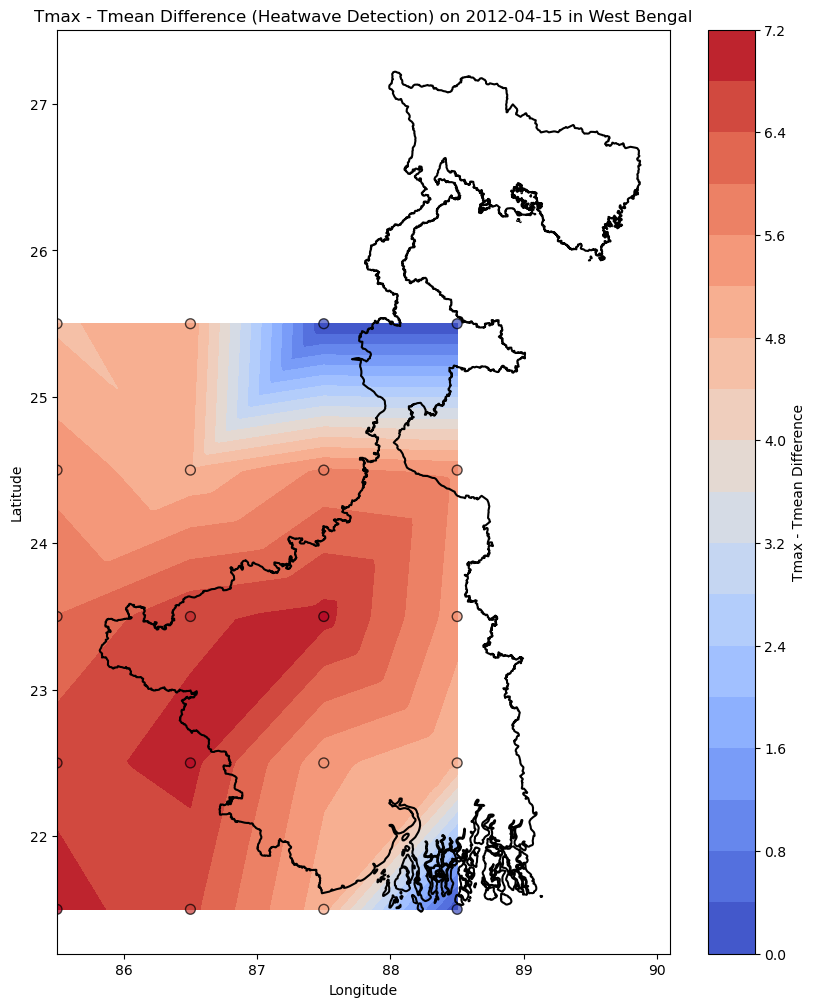

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import geopandas as gpd

specific_day = '2012-04-15'
df_single_day = df[df['Date'] == specific_day]

grid_lon, grid_lat = np.meshgrid(
    np.linspace(df_single_day['Longitude'].min(), df_single_day['Longitude'].max(), 100),  # 100 points along Longitude
    np.linspace(df_single_day['Latitude'].min(), df_single_day['Latitude'].max(), 100)  # 100 points along Latitude
)
points = df_single_day[['Longitude', 'Latitude']].values
values = df_single_day['Tmax_TmeanDiff_MarToJun'].values
grid_values = griddata(points, values, (grid_lon, grid_lat), method='linear')

fig, ax = plt.subplots(figsize=(10, 12))
contour = ax.contourf(grid_lon, grid_lat, grid_values, cmap='coolwarm', levels=20)
west_bengal_map.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)

cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('Tmax - Tmean Difference')
scatter = ax.scatter(
    df_single_day['Longitude'], df_single_day['Latitude'], 
    c=df_single_day['Tmax_TmeanDiff_MarToJun'], 
    cmap='coolwarm', s=50, edgecolor='k', alpha=0.7
)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'Tmax - Tmean Difference (Heatwave Detection) on {specific_day} in West Bengal')

plt.show()


In [301]:
from matplotlib.animation import FuncAnimation

In [50]:
import os
output_folder = '2012_plots'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
df['Date'] = pd.to_datetime(df['Date'])
df_may_2012 = df[(df['Date'].dt.year == 2012)]
grid_lon, grid_lat = np.meshgrid(
    np.linspace(df_may_2012['Longitude'].min(), df_may_2012['Longitude'].max(), 100),  # 100 points along Longitude
    np.linspace(df_may_2012['Latitude'].min(), df_may_2012['Latitude'].max(), 100)  # 100 points along Latitude
)
for specific_day in df_may_2012['Date'].unique():
    df_single_day = df_may_2012[df_may_2012['Date'] == specific_day]
    
    # Extract points (Longitude, Latitude) and values (Tmax_TmeanDiff_MarToJun)
    points = df_single_day[['Longitude', 'Latitude']].values
    values = df_single_day['Tmax_TmeanDiff_MarToJun'].values
    
    # Interpolate the values onto the new grid using Bilinear interpolation
    grid_values = griddata(points, values, (grid_lon, grid_lat), method='linear')
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 12))
    
    # Create a contour plot for the interpolated data
    contour = ax.contourf(grid_lon, grid_lat, grid_values, cmap='coolwarm', levels=20)
    
    # Plot the West Bengal map with transparent fill and visible outline
    west_bengal_map.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)
    
    # Add colorbar
    # cbar = plt.colorbar(contour, ax=ax)
    # cbar.set_label('Tmax - Tmean Difference')
    
    # Scatter the original grid points on top of the contour plot
    ax.scatter(
        df_single_day['Longitude'], df_single_day['Latitude'], 
        c=df_single_day['Tmax_TmeanDiff_MarToJun'], 
        cmap='coolwarm', s=50, edgecolor='k', alpha=0.7
    )
        
    # Set labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Tmax - Tmean Difference (Heatwave Detection) on {specific_day.date()} in West Bengal')
    
    # Save the plot as an image
    image_filename = f"{output_folder}/heatwave_{specific_day.date()}.png"
    plt.savefig(image_filename)
    
    # Close the plot to free memory
    plt.close(fig)

print(f"Images for May 2012 saved in '{output_folder}' folder.")

Images for May 2012 saved in '2012_plots' folder.
